In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,part,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   part                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.part.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
data.groupby(['salary','part']).size()#分组

salary  part       
high    IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
low     IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
medium  IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
dtype: int64

In [8]:
data = data.join(pd.get_dummies(data.salary))#独热编码one-hot

In [9]:
del data['salary']

In [10]:
data = data.join(pd.get_dummies(data.part))#独热编码one-hot

In [11]:
del data['part']

In [12]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [13]:
data.left.value_counts()#统计left不同值的个数

0    11428
1     3571
Name: left, dtype: int64

In [14]:
len(data)

14999

In [15]:
Y_data = data.left.values.reshape(-1,1)

In [16]:
Y_data.shape

(14999, 1)

In [17]:
Y = torch.from_numpy(Y_data).type(torch.float32)

In [18]:
Y

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [19]:
X_data= data[[c for c in data.columns if c !='left']].values#列表推导式

In [20]:
X = torch.from_numpy(X_data).type(torch.float32)

In [21]:
X.size()

torch.Size([14999, 20])

In [22]:
Y.shape

torch.Size([14999, 1])

## 创建模型

In [23]:
from torch import nn

自定义模型：  
__int__: 初始化所有的层  
forward：定义模型的运算过程（前向传播过程）

In [24]:
class Model(nn.Module):                        #不是model
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(20,64)       #输入20输出64
        self.linear_2 = nn.Linear(64,64)
        self.linear_3 = nn.Linear(64,1)        #逻辑回归最终输出为1
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self,input):
        x = self.linear_1(input)
        x = self.relu(x)
        x = self.linear_2(input)
        x = self.relu(x)
        x = self.linear_3(input)
        x = self.sigmoid(x)
        return x

In [25]:
model = Model()

## 改写模型

In [26]:
import torch.nn.functional as F

In [27]:
class Model(nn.Module):                        #不是model
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(20,64)       #输入20输出64
        self.linear_2 = nn.Linear(64,64)
        self.linear_3 = nn.Linear(64,1)        #逻辑回归最终输出为1
    def forward(self,input):
        x = F.relu(self.linear_1(input))
        x = F.relu((self.linear_2(x)))
        x = F.sigmoid((self.linear_3(x)))
        return x

In [28]:
model = Model()

In [29]:
model

Model(
  (linear_1): Linear(in_features=20, out_features=64, bias=True)
  (linear_2): Linear(in_features=64, out_features=64, bias=True)
  (linear_3): Linear(in_features=64, out_features=1, bias=True)
)

In [30]:
learning = 0.001

In [31]:
def get_model():
    model = Model()
    opt = torch.optim.Adam(model.parameters(),lr=learning)
    return model,opt

In [32]:
model ,optim = get_model()

## 定义损失函数

In [33]:
loss_fn = nn.BCELoss()

In [34]:
batch = 64
no_of_batches = len(data)//batch
epochs = 100

In [35]:
for epoch in range(epochs):
    for i in range(no_of_batches):
        start = i*batch
        end = start + batch
        x = X[start:end]
        y = Y[start:end]
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        print('epoch',epoch,'loss',loss_fn(model(X),Y).data.item())

D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 loss 0.5927024483680725
epoch 1 loss 0.6552059650421143
epoch 2 loss 0.5867846012115479
epoch 3 loss 0.6032168865203857
epoch 4 loss 0.6233773827552795
epoch 5 loss 0.6074861884117126
epoch 6 loss 0.6510524153709412
epoch 7 loss 0.6319971680641174
epoch 8 loss 0.5774888396263123
epoch 9 loss 0.6484155058860779
epoch 10 loss 0.6515631675720215
epoch 11 loss 0.6164216995239258
epoch 12 loss 0.5874398350715637
epoch 13 loss 0.5665642619132996
epoch 14 loss 0.5552641153335571
epoch 15 loss 0.5507842302322388
epoch 16 loss 0.5493012070655823
epoch 17 loss 0.5489226579666138
epoch 18 loss 0.5489834547042847
epoch 19 loss 0.548973560333252
epoch 20 loss 0.5490770936012268
epoch 21 loss 0.5490998029708862
epoch 22 loss 0.5492899417877197
epoch 23 loss 0.5492200255393982
epoch 24 loss 0.5492886900901794
epoch 25 loss 0.54923415184021
epoch 26 loss 0.5493602752685547
epoch 27 loss 0.549354076385498
epoch 28 loss 0.5492085814476013
epoch 29 loss 0.5492201447486877
epoch 30 loss 0.54923099

In [36]:
loss_fn(model(X),Y)

tensor(0.5490, grad_fn=<BinaryCrossEntropyBackward>)

## 使用dataset类进行重构

In [37]:
from torch.utils.data import TensorDataset

In [38]:
HRdataset = TensorDataset(X,Y)

In [39]:
HRdataset

In [40]:
len(HRdataset)

14999

In [41]:
HRdataset[2:5]

(tensor([[1.1000e-01, 8.8000e-01, 7.0000e+00, 2.7200e+02, 4.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00],
         [7.2000e-01, 8.7000e-01, 5.0000e+00, 2.2300e+02, 5.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00],
         [3.7000e-01, 5.2000e-01, 2.0000e+00, 1.5900e+02, 3.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
          0.0000e+00, 0.0000e+00]]),
 tensor([[1.],
         [1.],
         [1.]]))

In [42]:
model ,optim = get_model()

In [43]:
for epoch in range(epochs):
    for i in range(no_of_batches):
        #start = i*batch
        #end = start + batch
        #x = X[start:end]
        #y = Y[start:end]
        x,y = HRdataset[i*batch:i*batch+batch]
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        print('epoch',epoch,'loss',loss_fn(model(X),Y).data.item())

epoch 0 loss 0.5840166211128235
epoch 1 loss 0.5937082171440125
epoch 2 loss 0.5775942802429199
epoch 3 loss 0.5740918517112732
epoch 4 loss 0.6236390471458435
epoch 5 loss 0.6131027936935425
epoch 6 loss 0.6411235928535461
epoch 7 loss 0.6231314539909363
epoch 8 loss 0.5792242288589478
epoch 9 loss 0.5579831004142761
epoch 10 loss 0.5511090755462646
epoch 11 loss 0.5490661859512329
epoch 12 loss 0.548747181892395
epoch 13 loss 0.548991322517395
epoch 14 loss 0.5488781929016113
epoch 15 loss 0.54966139793396
epoch 16 loss 0.5490298271179199
epoch 17 loss 0.5489349961280823
epoch 18 loss 0.5490275621414185
epoch 19 loss 0.5489771366119385
epoch 20 loss 0.5491146445274353
epoch 21 loss 0.5492742657661438
epoch 22 loss 0.5491925477981567
epoch 23 loss 0.5492414832115173
epoch 24 loss 0.5493940114974976
epoch 25 loss 0.5492187738418579
epoch 26 loss 0.5492393374443054
epoch 27 loss 0.5492630004882812
epoch 28 loss 0.5492633581161499
epoch 29 loss 0.5492414236068726
epoch 30 loss 0.54927855

## dataloader类

In [44]:
from torch.utils.data import DataLoader

In [45]:
HR_ds = TensorDataset(X,Y)
HR_dl = DataLoader(HR_ds,batch_size=batch,shuffle=True)   #shuffle代表是否乱序

In [46]:
model ,optim = get_model()

In [47]:
for epoch in range(epochs):
    for x,y in HR_dl:
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        print(' epoch ',epoch,' loss ',loss_fn(model(X),Y).data.item())

 epoch  0  loss  0.539408802986145
 epoch  1  loss  0.4217658042907715
 epoch  2  loss  0.3445434868335724
 epoch  3  loss  0.32107123732566833
 epoch  4  loss  0.33560508489608765
 epoch  5  loss  0.2963852882385254
 epoch  6  loss  0.38604986667633057
 epoch  7  loss  0.26753678917884827
 epoch  8  loss  0.26621219515800476
 epoch  9  loss  0.2792888879776001
 epoch  10  loss  0.25702884793281555
 epoch  11  loss  0.2834628224372864
 epoch  12  loss  0.2485664188861847
 epoch  13  loss  0.24139216542243958
 epoch  14  loss  0.24129919707775116
 epoch  15  loss  0.23803061246871948
 epoch  16  loss  0.23438630998134613
 epoch  17  loss  0.2652568221092224
 epoch  18  loss  0.22176623344421387
 epoch  19  loss  0.2260322868824005
 epoch  20  loss  0.21701645851135254
 epoch  21  loss  0.22693881392478943
 epoch  22  loss  0.20940974354743958
 epoch  23  loss  0.25319334864616394
 epoch  24  loss  0.21331121027469635
 epoch  25  loss  0.20442485809326172
 epoch  26  loss  0.211746901273

# 添加验证  
## 了解过拟合与欠拟合

In [48]:
!pip install sklearn

Looking in indexes: http://pypi.mirrors.ustc.edu.cn/simple


In [49]:
from sklearn.model_selection import train_test_split

In [51]:
train_x,test_x,train_y,test_y = train_test_split(X_data,Y_data)

In [52]:
X_data.shape

(14999, 20)

In [53]:
train_x.shape,test_x.shape

((11249, 20), (3750, 20))

In [54]:
train_x = torch.from_numpy(train_x).type(torch.float32)
train_y = torch.from_numpy(train_y).type(torch.float32)
test_x = torch.from_numpy(test_x).type(torch.float32)
test_y = torch.from_numpy(test_y).type(torch.float32)

In [55]:
train_ds = TensorDataset(train_x,train_y)
train_dl = DataLoader(train_ds,batch_size=batch,shuffle=True)

In [61]:
test_ds = TensorDataset(test_x,test_y)
test_dl = DataLoader(test_ds,batch_size=batch)  #测试集不需要乱序

如何计算正确率？

In [71]:
def accuracy(y_pred,y_true):
    y_pred = (y_pred > 0.5).type(torch.float32)
    acc = (y_pred == y_true).float().mean()
    return acc

In [63]:
model ,optim = get_model()

In [73]:
Epoch = []
train_acc = []
train_loss = []
test_acc = []
test_loss = []

In [74]:
for epoch in range(epochs):
    for x,y in train_dl:
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        epoch_accuracy = accuracy(model(train_x),train_y)
        epoch_loss = loss_fn(model(train_x),train_y).data
        epoch_test_accuracy = accuracy(model(test_x),test_y)
        epoch_test_loss = loss_fn(model(test_x),test_y).data
        
        Epoch.append(epoch)
        train_acc.append(epoch_accuracy)
        train_loss.append(epoch_loss)
        test_acc.append(epoch_test_accuracy)
        test_loss.append(epoch_test_accuracy)
        
        print(' epoch ',epoch,
              ' loss ',round(epoch_loss.item(),3),
              ' accuracy ',round(epoch_accuracy.item(),3),
              ' test_loss ',round(epoch_test_loss.item(),3),
              ' test_accuracy ',round(epoch_test_accuracy.item(),3)
             )

 epoch  0  loss  0.096  accuracy  0.971  test_loss  0.127  test_accuracy  0.958
 epoch  1  loss  0.124  accuracy  0.961  test_loss  0.157  test_accuracy  0.951
 epoch  2  loss  0.1  accuracy  0.969  test_loss  0.131  test_accuracy  0.96
 epoch  3  loss  0.093  accuracy  0.971  test_loss  0.123  test_accuracy  0.962
 epoch  4  loss  0.092  accuracy  0.972  test_loss  0.12  test_accuracy  0.962
 epoch  5  loss  0.098  accuracy  0.972  test_loss  0.126  test_accuracy  0.959
 epoch  6  loss  0.107  accuracy  0.967  test_loss  0.139  test_accuracy  0.959
 epoch  7  loss  0.101  accuracy  0.968  test_loss  0.129  test_accuracy  0.959
 epoch  8  loss  0.094  accuracy  0.973  test_loss  0.127  test_accuracy  0.963
 epoch  9  loss  0.088  accuracy  0.973  test_loss  0.12  test_accuracy  0.963
 epoch  10  loss  0.093  accuracy  0.972  test_loss  0.128  test_accuracy  0.962
 epoch  11  loss  0.096  accuracy  0.971  test_loss  0.123  test_accuracy  0.963
 epoch  12  loss  0.11  accuracy  0.964  te

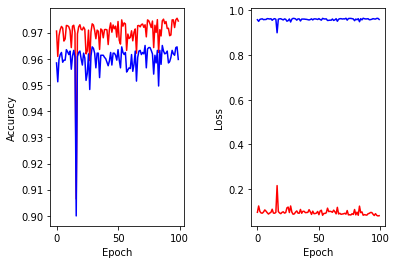

In [79]:
plt.subplot(1,2,1)
plt.plot(Epoch,train_acc,'r',label='train_acc')
plt.plot(Epoch,test_acc,'b',label='test_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(Epoch,train_loss,'r',label='train_loss')
plt.plot(Epoch,test_loss,'b',label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()